In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [5]:
def readh5files(arx):

    print('DATA FROM FILE:      ',arx)

    with h5py.File(arx, "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())

        Sf = np.array(f.get('S_f'))
        x = np.array(f.get('x'))
        y = np.array(f.get('y'))
        z = np.array(f.get('z'))
        xf = np.array(f.get('x_f'))
        yf = np.array(f.get('y_f'))
        zf = np.array(f.get('z_f'))
        rho = np.array(f.get('rho_mean'))
        Mxx = np.array(f.get('stress_Mxx'))
        Mxy = np.array(f.get('stress_Mxy'))
        Mxz = np.array(f.get('stress_Mxz'))
        Myy = np.array(f.get('stress_Myy'))
        Myz = np.array(f.get('stress_Myz'))
        Mzz = np.array(f.get('stress_Mzz'))
        Rxx = np.array(f.get('stress_Rxx'))
        Rxy = np.array(f.get('stress_Rxy'))
        Rxz = np.array(f.get('stress_Rxz'))
        Ryy = np.array(f.get('stress_Ryy'))
        Ryz = np.array(f.get('stress_Ryz'))
        Rzz = np.array(f.get('stress_Rzz'))
        Fxx = np.array(f.get('stress_Fxx'))
        Fxy = np.array(f.get('stress_Fxy'))
        Fxz = np.array(f.get('stress_Fxz'))
        Fyx = np.array(f.get('stress_Fyx'))
        Fyy = np.array(f.get('stress_Fyy'))
        Fyz = np.array(f.get('stress_Fyz'))
        Fzx = np.array(f.get('stress_Fzx'))
        Fzy = np.array(f.get('stress_Fzy'))
        Fzz = np.array(f.get('stress_Fzz'))

        time = np.array(f.get('time'))

        f.close()

    M = np.array([Mxx,Mxy,Mxz,Myy,Myz,Mzz])
    R = np.array([Rxx,Rxy,Rxz,Ryy,Ryz,Rzz])
    F = np.array([Fyx-Fxy,Fzx-Fxz,Fzy-Fyz])

    print('Dimensions of the grid     :',len(x)," x ",len(y)," x ",len(z))
    print('Time           :',time)

    return [M, R, F, rho, x, y, z, xf, yf, zf]

def stresses(Sf,bx0,leng,path_data,told):

    ind = 0
    t = told[ind:]

    lent = len(t)

    inivars = readh5files(path_data+'/results/stress_tensors/Sf_'+str(Sf)+'/stresses--'+str(leng)+'--bx'+bx0+'--Sf-'+str(Sf)+'-0200.h5')

    xfilter = inivars[7]
    yfilter = inivars[8]
    zfilter = inivars[9]

    Msim = np.zeros((lent,6,len(xfilter),len(yfilter),len(zfilter)))
    Rsim = np.zeros((lent,6,len(xfilter),len(yfilter),len(zfilter)))
    Fsim = np.zeros((lent,3,len(xfilter),len(yfilter),len(zfilter)))
    rhomean = np.zeros((lent,len(xfilter),len(yfilter),len(zfilter)))
    g_khi = np.zeros((len(told),len(xfilter),len(yfilter),len(zfilter)))

    for tt in range(0, lent):

        arx = format(int(10*t[tt]), "04")
        Msim[tt], Rsim[tt], Fsim[tt], rhomean[tt], x, y, z, xfilter, yfilter, zfilter = readh5files(path_data+'/results/stress_tensors/Sf_'+str(Sf)+'/stresses--'+str(leng)+'--bx'+bx0+'--Sf-'+str(Sf)+'-'+arx+'.h5')


    ekhi = 0.5*rhomean[:,:,:,:]*(Rsim[:,0,:,:,:]+Rsim[:,3,:,:,:]+Rsim[:,5,:,:,:])
    
    return t,ekhi



In [6]:
bx0 = '3e-4'
leng = 256
res = str(leng)+'_'+str(leng)+'_'+str(leng)

path_data = "/home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_"+res+"/CVP--bx"+bx0+"--"+str(leng)+"--rndom"

t_final = 40
lent = 401
t = np.linspace(0,t_final,lent)

#Sf = [30,40,50,70,80,90]
Sf = [20,24,28]
ekhi = []

for ss in Sf:
    tnew,ekhisf = stresses(ss,bx0,leng,path_data,t)
    ekhi.append(ekhisf)
    
en_mean = []   
for en in ekhi:
    en_mean.append(np.mean(en, axis = (1,2,3)))

en_mean = np.array(en_mean)

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0200.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 20.0
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0000.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_

Dimensions of the grid     : 256  x  256  x  256
Time           : 3.4000000000000004
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0035.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 3.5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0036.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_

Dimensions of the grid     : 256  x  256  x  256
Time           : 7.0
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0071.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 7.1000000000000005
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0072.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_

Dimensions of the grid     : 256  x  256  x  256
Time           : 10.700000000000001
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0108.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 10.8
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0109.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 14.4
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0145.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 14.5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0146.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 18.1
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0182.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 18.2
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0183.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 21.8
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0219.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 21.900000000000002
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0220.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 25.5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0256.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 25.6
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0257.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 29.200000000000003
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0293.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 29.3
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0294.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 32.9
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0330.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 33.0
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0331.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 36.6
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0367.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 36.7
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_20/stresses--256--bx3e-4--Sf-20-0368.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 0.1
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0002.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 0.2
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0003.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_F

Dimensions of the grid     : 256  x  256  x  256
Time           : 3.8000000000000003
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0039.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 3.9000000000000004
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0040.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0076.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 7.6000000000000005
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0077.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0113.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 11.3
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0114.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_

Dimensions of the grid     : 256  x  256  x  256
Time           : 14.9
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0150.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 15.0
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0151.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 18.6
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0187.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 18.7
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0188.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 22.3
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0224.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 22.400000000000002
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0225.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0261.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 26.1
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0262.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_

Dimensions of the grid     : 256  x  256  x  256
Time           : 29.700000000000003
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0298.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 29.8
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0299.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 33.4
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0335.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 33.5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0336.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 37.1
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0372.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 37.2
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_24/stresses--256--bx3e-4--Sf-24-0373.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 0.6000000000000001
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0007.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 0.7000000000000001
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0008.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress

DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0044.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 4.4
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0045.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_F

Dimensions of the grid     : 256  x  256  x  256
Time           : 8.0
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0081.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 8.1
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0082.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_F

Dimensions of the grid     : 256  x  256  x  256
Time           : 11.700000000000001
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0118.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 11.8
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0119.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 15.4
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0155.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 15.5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0156.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 19.1
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0192.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 19.200000000000003
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0193.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 22.8
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0229.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 22.900000000000002
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0230.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 26.5
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0266.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 26.6
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0267.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 30.200000000000003
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0303.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 30.3
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0304.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 33.9
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0340.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 34.0
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0341.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

Dimensions of the grid     : 256  x  256  x  256
Time           : 37.6
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0377.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress_Fxz', 'stress_Fyx', 'stress_Fyy', 'stress_Fyz', 'stress_Fzx', 'stress_Fzy', 'stress_Fzz', 'stress_Mxx', 'stress_Mxy', 'stress_Mxz', 'stress_Myy', 'stress_Myz', 'stress_Mzz', 'stress_Rxx', 'stress_Rxy', 'stress_Rxz', 'stress_Ryy', 'stress_Ryz', 'stress_Rzz', 'time', 'x', 'x_f', 'y', 'y_f', 'z', 'z_f']>
Dimensions of the grid     : 256  x  256  x  256
Time           : 37.7
DATA FROM FILE:       /home/miquelmiravet/University/Doctorat/Projects/sub-grid_models/DATA/KHI/res_256_256_256/CVP--bx3e-4--256--rndom/results/stress_tensors/Sf_28/stresses--256--bx3e-4--Sf-28-0378.h5
Keys: <KeysViewHDF5 ['S_f', 'rho_mean', 'stress_Fxx', 'stress_Fxy', 'stress

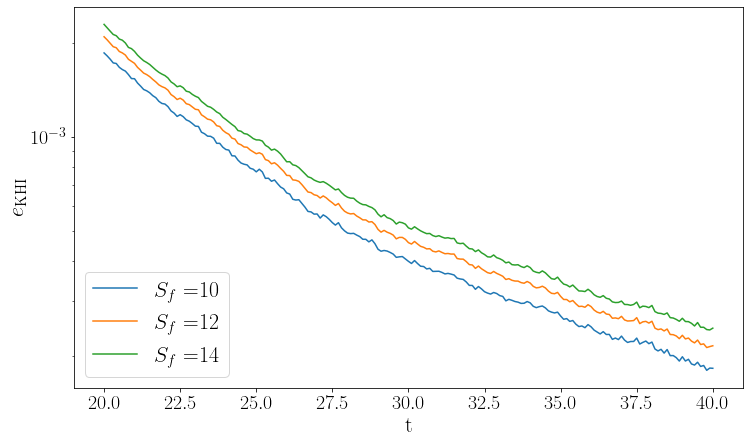

In [11]:
fig, ax = plt.subplots(figsize = (12,7))

ax.tick_params(axis='y',labelsize = 20)
ax.tick_params(axis='x',labelsize = 20)

for i in range(0,len(Sf)):
    ax.plot(tnew,en_mean[i,:],label = r'$S_f=$'+str(Sf[i]))
ax.set_xlabel('t', fontsize = '22')
ax.set_ylabel(r'$e_{\rm KHI}$',fontsize = '22')
ax.set_yscale('log')
ax.legend(loc='lower left',fontsize = '22')

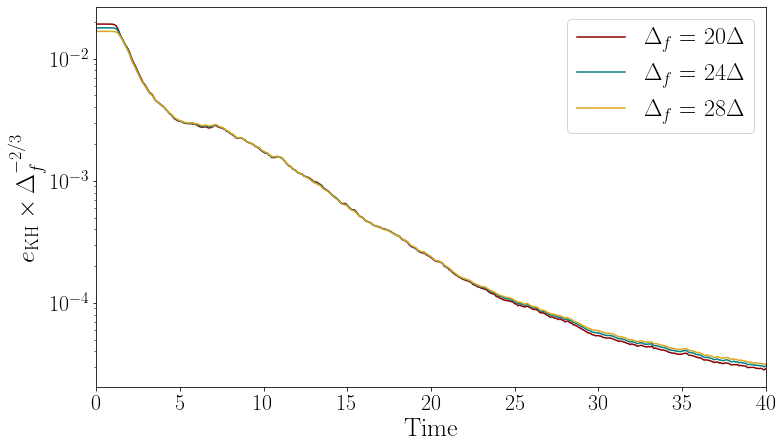

In [12]:
fig, ax = plt.subplots(figsize = (12,7))

ax.tick_params(axis='y',labelsize = 22)
ax.tick_params(axis='x',labelsize = 22)
color = ['darkred','teal','goldenrod']

for i in range(0,len(Sf)):
    ax.plot(tnew,en_mean[i,:]/Sf[i]**(2/3), color = color[i],label = r'$\Delta_f=$ '+str(Sf[i])+'$\Delta$')

#ax.set_title(r'$e\propto \Delta_f^{2/3}$', fontsize =25)
ax.set_xlabel('Time', fontsize = '26')
ax.set_xlim([0,40])
ax.set_ylabel(r'$e_{\rm KH}\times\Delta_f^{-2/3}$',fontsize = '26')
ax.set_yscale('log')
ax.legend(loc='upper right',fontsize = '24')
plt.savefig('/home/miquelmiravet/Desktop/figs_khi/en_khi_sf.pdf',bbox_inches='tight')